### First we will read the data set and perform 
### Exploratory Data Analysis to understand the data set
###### Link to dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
# lets check the shape of dataset
df.shape


(7043, 21)

In [40]:
# the dataset has 7043 rows and 21 columns
# lets explore for any missing values
df.isna().sum().sum()


0

In [41]:
# there is no missing values so we can jump into exploring the data set
# lets check the counts of our target variable which is Churn
df.Churn.value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

The imbalanced class distribution of the target variable, where the positive class (Churn=Yes) is significantly smaller than the negative class (Churn=No), can have a negative impact on the performance of a machine learning model. To address this issue, we can employ upsampling or downsampling techniques.

Before attempting to build a model, it is advisable to explore the features (independent variables) first. In this context, let's identify the features that have only two distinct values and features which have more than two distinct values

In [42]:
columns = df.columns
binary_cols = []
non_binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
        non_binary_cols.append(col)

print("Binary Cols:", binary_cols)
print("Non-Binary Cols:", non_binary_cols)


Binary Cols: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Non-Binary Cols: ['customerID', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


Let’s check the class distribution of binary features.

<AxesSubplot: xlabel='PaperlessBilling', ylabel='count'>

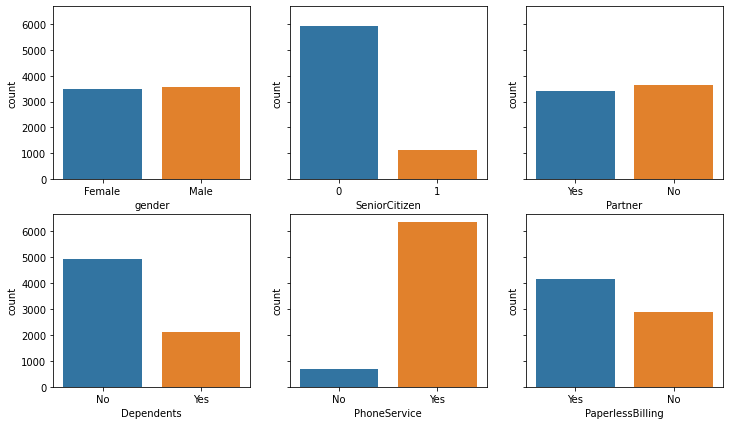

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(x="gender", data=df, ax=axes[0, 0])
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0, 1])
sns.countplot(x="Partner", data=df, ax=axes[0, 2])
sns.countplot(x="Dependents", data=df, ax=axes[1, 0])
sns.countplot(x="PhoneService", data=df, ax=axes[1, 1])
sns.countplot(x="PaperlessBilling", data=df, ax=axes[1, 2])


To examine how the target variable (churn) changes with respect to binary features, it is recommended to convert the values of the target variable to numerical values. In this case, we can assign "Yes" as 1 and "No" as 0. This conversion will allow us to perform calculations and analyze the relationship between the target variable and the binary features.

In [44]:
churn_numeric = {"Yes": 1, "No": 0}
df.Churn.replace(churn_numeric, inplace=True)


Let’s see if churn rate is different for males and females:

In [45]:
df[["gender", "Churn"]].groupby(["gender"]).mean()



,Churn
gender,
Female,0.269209
Male,0.261603


The average churn rate for males and females is approximately the same, indicating that the gender variable does not provide valuable predictive power for the model. Consequently, I will exclude the gender variable from the machine learning model.

Similarly, we can examine other binary categorical features in terms of churn rate:

In [46]:
print(df[["SeniorCitizen", "Churn"]].groupby(["SeniorCitizen"]).mean())
print(df[["Partner", "Churn"]].groupby(["Partner"]).mean())
print(df[["Dependents", "Churn"]].groupby(["Dependents"]).mean())
print(df[["PhoneService", "Churn"]].groupby(["PhoneService"]).mean())
print(df[["PaperlessBilling", "Churn"]].groupby(["PaperlessBilling"]).mean())



                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
            Churn
Partner          
No       0.329580
Yes      0.196649
               Churn
Dependents          
No          0.312791
Yes         0.154502
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
                     Churn
PaperlessBilling          
No                0.163301
Yes               0.335651


We can see that the other binary features have an effect on the target variable.

#### Other Categorical Features

Now, let's move on to exploring other categorical features. In addition to the binary features we discussed earlier, we also have continuous features such as tenure, monthly charges, and total charges. These continuous features will be addressed and analyzed in the next part of our exploration.

There are 6 variables that come with internet service which are StreamingTV, StreamingMovies, OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport. There variables come into play if customer has internet service.

<AxesSubplot: xlabel='InternetService', ylabel='count'>

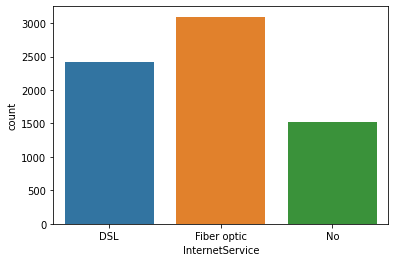

In [47]:
sns.countplot(x="InternetService", data=df)


In [48]:
df[["InternetService", "Churn"]].groupby(["InternetService"]).mean()



,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


The "Internet service" variable plays a significant role in predicting the churn rate. We can observe that customers with fiber optic internet service are much more likely to churn compared to customers with DSL, despite there not being a significant difference in the number of customers between the two types of internet service. This observation suggests that there might be issues with the fiber optic connection provided by the company. However, it is important to note that making assumptions based on a single variable is not a reliable approach. To gain further insights, let's also examine the relationship between the churn rate and the "monthly charges" variable.

In [49]:
df[["InternetService", "MonthlyCharges"]].groupby(["InternetService"]).mean()



,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

We can now check the distributions of internet service related variables:

<AxesSubplot: xlabel='TechSupport', ylabel='count'>

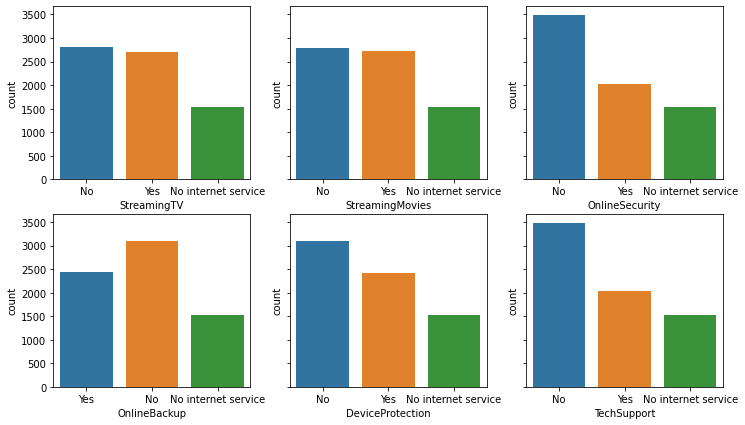

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(x="StreamingTV", data=df, ax=axes[0, 0])
sns.countplot(x="StreamingMovies", data=df, ax=axes[0, 1])
sns.countplot(x="OnlineSecurity", data=df, ax=axes[0, 2])
sns.countplot(x="OnlineBackup", data=df, ax=axes[1, 0])
sns.countplot(x="DeviceProtection", data=df, ax=axes[1, 1])
sns.countplot(x="TechSupport", data=df, ax=axes[1, 2])



In [51]:
print(df[["StreamingTV", "Churn"]].groupby(["StreamingTV"]).mean())
print(df[["StreamingMovies", "Churn"]].groupby(["StreamingMovies"]).mean())
print(df[["OnlineSecurity", "Churn"]].groupby(["OnlineSecurity"]).mean())
print(df[["OnlineBackup", "Churn"]].groupby(["OnlineBackup"]).mean())
print(df[["DeviceProtection", "Churn"]].groupby(["DeviceProtection"]).mean())
print(df[["TechSupport", "Churn"]].groupby(["TechSupport"]).mean())


                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315
                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021
                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663


The churn rates vary for different classes within all internet service-related features, indicating that the presence or absence of these services affects the likelihood of churn. While the differences in churn rates for StreamingTV and StreamingMovies are not significant, these features can still provide value to the model. However, it is ultimately our decision whether to include them.

Considering the aforementioned information, we may choose not to include StreamingTV and StreamingMovies as features in the machine learning model.

In [52]:
print(df.PhoneService.value_counts())
print(df.MultipleLines.value_counts())


Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


If a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. So I will not include PhoneService column as I can understand the number of people who have phone service from MultipleLines column. MultipleLines column takes the PhoneService column one step further.

Let’s also check if having multiple lines changes the churn rate:

In [53]:
df[["MultipleLines", "Churn"]].groupby(["MultipleLines"]).mean()



,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


Given the similarity to the StreamingTV and StreamingMovies variables, the decision to include this similar variable in the model is at our discretion. If we believe that this variable holds valuable information and can contribute to the predictive power of the model, it is advisable to include it. Therefore, we can choose to include this similar variable in the model alongside StreamingTV and StreamingMovies.

#### Contract and Payment Method

<AxesSubplot: xlabel='Contract', ylabel='count'>

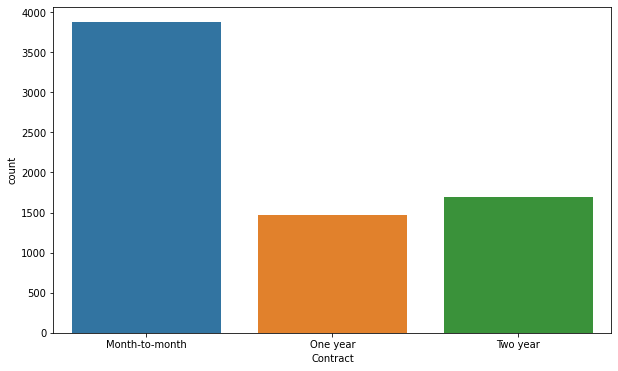

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Contract", data=df)


In [55]:
df[["Contract", "Churn"]].groupby(["Contract"]).mean()



,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


As anticipated, customers with short-term contracts have a higher tendency to churn. This observation clearly highlights the importance for companies to establish long-term relationships with their customers. By fostering lasting connections, companies can reduce the likelihood of customer churn and maintain a more stable customer base.

<AxesSubplot: xlabel='PaymentMethod', ylabel='count'>

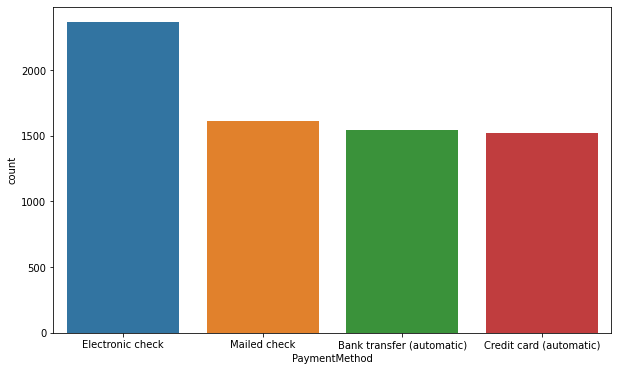

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x="PaymentMethod", data=df)


In [57]:
df[["PaymentMethod", "Churn"]].groupby(["PaymentMethod"]).mean()



,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Customers who use electronic checks for payment are more likely to stop using the service and leave compared to customers who use other payment methods. Electronic check payments are also more commonly used among customers than other payment types. This indicates that it would be useful to further investigate this group of customers to identify any shared traits or patterns that may contribute to their higher churn rate.

#### Continuous Features

We have three types of information that are continuous in our dataset: tenure (the length of time a customer has been with the company), monthly charges (the amount the customer pays each month), and total charges (the accumulated amount a customer has paid over their tenure).

Notably, the total charges can be calculated by multiplying the tenure by the monthly charges. Therefore, including total charges as a separate piece of information in our model is unnecessary. Having unnecessary information can make the model more complicated. Models that are too complex tend to focus too much on the training data and may not work well with new, unseen data. Since the main goal of our model is to accurately predict or explain new data, we need to be cautious of overfitting.

Additionally, it would be helpful to examine the distribution of these continuous features. This will give us a better understanding of how these features are distributed and how they might impact our target variable.

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Count'>

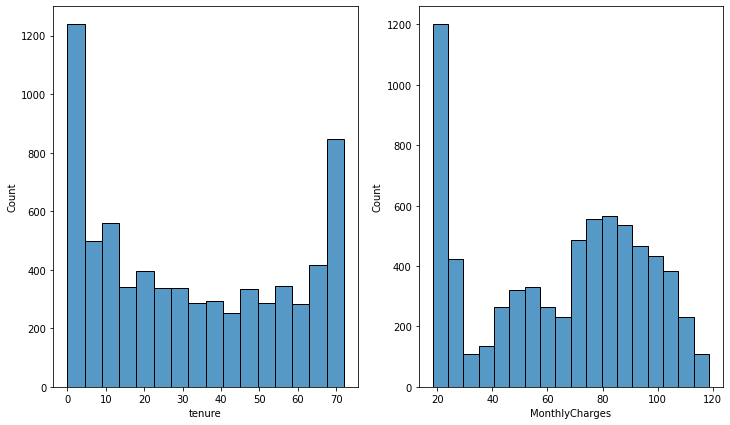

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df["tenure"], ax=axes[0])
sns.histplot(df["MonthlyCharges"], ax=axes[1])


When we examine the distribution of the tenure variable, we notice that most customers fall into two categories: those who are relatively new and those who have been with the company for a long time. Our objective should focus on finding strategies to retain customers who have been with us for only a few months.

A similar pattern can be observed with the MonthlyCharges variable. There appears to be a gap between customers with low rates and those with high rates.

Now, let's investigate how the churn rate varies based on tenure and MonthlyCharges.

In [59]:
df[["tenure", "MonthlyCharges", "Churn"]].groupby(["Churn"]).mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


It is evident that customers who have been with the company for a longer duration are more likely to stay. On average, customers who left the company had a tenure that was 20 months less than those who chose to stay.

Moreover, the monthly charges also appear to have an impact on the churn rate.

There could be a correlation between the contract and tenure features since customers with long-term contracts tend to stay with the company for a longer period. Let's further investigate this relationship to gain a better understanding.

In [60]:
df[["Contract", "tenure"]].groupby(["Contract"]).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


As anticipated, there is a strong correlation between the contract and tenure variables. Customers with longer contracts have generally been with the company for a longer duration compared to those with short-term contracts. Based on this observation, it appears that the contract variable would provide little to no additional value beyond what the tenure feature already captures. Therefore, I have decided not to include the contract feature in the model.

After exploring the variables, I have determined that the following variables do not significantly contribute to the informative power of the model and will not be utilized:

- Customer ID
- Gender
- PhoneService
- Contract
- TotalCharges

In [61]:
df.drop(
    ["customerID", "gender", "PhoneService", "Contract", "TotalCharges"],
    axis=1,
    inplace=True,
)



To include categorical features in a machine learning model, they need to be converted into numerical form. However, it's important to note that our categorical variables are not in any particular order or rank. For example, there is no inherent superiority of "DSL" internet service over "Fiber optic" internet service. On the other hand, an ordinal categorical variable would involve categories with a specific order, such as ratings from 1 to 5 or categories like "bad," "average," and "good."

When we encode categorical variables, each category is assigned a number. However, assigning higher numbers to certain categories can wrongly imply their importance or influence on the model. To avoid this, we need to use a technique called one-hot encoding. This method creates separate columns for each category, where the value in each column is either 0 or 1, indicating the presence or absence of that category.

Additionally, we also need to scale the continuous variables. Otherwise, variables with higher numerical values will have a greater impact on the model's accuracy, potentially overshadowing other variables. Scaling ensures that all variables are on a similar scale and have equal importance in the model's calculations.

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [63]:
# Encoding categorical variables:
cat_features = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling",
    "PaymentMethod",
]
X = pd.get_dummies(df, columns=cat_features, drop_first=True)


In [64]:
# Scaling continuous variables:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [65]:
# Let’s check the new dimension of the dataset:
X.shape
(7043, 26)

(7043, 26)

#### Resampling

As mentioned earlier, having imbalanced class distribution in the target variable is not ideal for machine learning models. In this case, we will employ a technique called upsampling to address this issue. Upsampling involves increasing the number of samples in the class with fewer instances by randomly selecting rows from it and duplicating them. This process aims to balance the representation of both classes, allowing the model to learn more effectively from the data.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

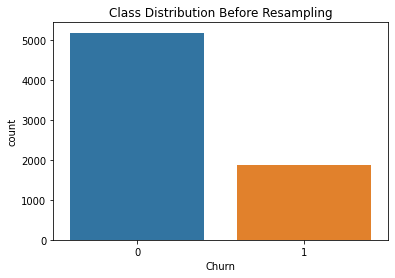

In [66]:
sns.countplot(x="Churn", data=df).set_title("Class Distribution Before Resampling")



In [67]:
# Separating positive class (churn=yes) and negative class (churn=no)
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]
# Upsampling the positive class:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
len(X_yes_upsampled)


5174

Text(0.5, 1.0, 'Class Distribution After Resampling')

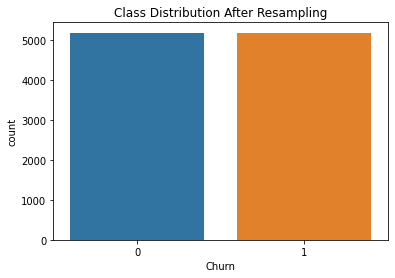

In [68]:
# Combining positive and negative class and checking class distribution
X_upsampled = pd.concat([X_no, X_yes_upsampled], ignore_index=True)

sns.countplot(x="Churn", data=X_upsampled).set_title(
    "Class Distribution After Resampling"
)



In [69]:
from sklearn.model_selection import train_test_split

X = X_upsampled.drop(["Churn"], axis=1)  # features (independent variables)
y = X_upsampled["Churn"]  # target (dependent variable)
# Dividing dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



#### Ridge Classifier

I have chosen to use the Ridge Classifier as the base model for my analysis. After evaluating its performance, I will then explore and experiment with another model that I believe has the potential to deliver better results. By comparing the performance of these models, I can determine which one is more suitable for the given task.

In [70]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# Creating a ridge classifier object and training it
clf_ridge = RidgeClassifier()  # create a ridge classifier object
clf_ridge.fit(X_train, y_train)  # train the model

# Making predictions on training set and evaluating
pred = clf_ridge.predict(X_train)
print("Training Accuracy:", round(accuracy_score(y_train, pred), 4))

# Making predictions on test set and evaluating
pred_test = clf_ridge.predict(X_test)
print("Test Accuracy:", round(accuracy_score(y_test, pred_test), 4))


Training Accuracy: 0.7574
Test Accuracy: 0.7609


The Ridge Classifier model achieved an accuracy of 75% on the training set and 76% on the test set. The relatively close accuracies on both sets suggest that the model is not overfitting, as it performs similarly on both the data it was trained on and new, unseen data. However, a 75% accuracy level is not considered very high for this task. Therefore, we will explore alternative models in an attempt to improve the accuracy and find a better-performing model.

#### Random Forest

Now we will try random forest and then we can compare the models.

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Creating a random forest object and training it
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

There are two parameters we need to mention here.

n_estimators: The number of trees in the forest.

max_depth: The maximum depth of the tree.
These parameters have critical roles in the accuracy of model and also preventing the model from overfitting. In general, if we use deep trees (max_depth is very high), the model may end up overfitting.

In [72]:
# Making predictions on training set and evaluating
pred = clf_forest.predict(X_train)
print("Training Accuracy:", round(accuracy_score(y_train, pred),4))

# Making predictions on test set and evaluating
pred_test = clf_forest.predict(X_test)
print("Test Accuracy:", round(accuracy_score(y_test, pred_test), 4))

Training Accuracy: 0.8839
Test Accuracy: 0.842


The model exhibits a slight overfitting as the accuracy on the training set is 4% higher than the accuracy on the test set. One approach to mitigate overfitting is by reducing the depth of the decision trees in the random forest. Deeper trees tend to become more specific and may not generalize well to new data. However, it's important to note that decreasing tree depth could potentially decrease the accuracy of the model.

To address overfitting, we can also increase the number of trees in the random forest. This helps the model to generalize better and reduces overfitting tendencies. However, when optimizing the parameters, we need to be cautious as changing them can have an impact on the overall accuracy.

Another technique that can be employed is cross-validation. By using cross-validation, we can make use of every sample in both the training and test sets, leading to a more robust evaluation of the model's performance.

Parameter tuning plays a crucial role in achieving optimal results and is an essential part of almost every project.

#### Improving the model

GridSearchCV provides an easy way for parameter tuning. We can do cross-validation and try different parameters using GridSearchCV.

In [73]:
from sklearn.model_selection import GridSearchCV
# Creating a GridSearchCV object
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

Setting cv = 5 indicates a 5-fold cross-validation approach. In this method, the dataset is divided into five subsets or folds. During each iteration, four subsets are used for training the model, while the remaining subset is used as the test set. After completing five iterations, the model has utilized all samples in the dataset as both training and test samples.

The n_jobs parameter determines the number of processors to be utilized. When set to -1, it signifies the usage of all available processors, maximizing computational efficiency during the model training and evaluation process.

In [74]:
clf.fit(X, y)
# Lets check the best parameters and overall accuracy
print("Best Parameters:", clf.best_params_)
print("Best Accuracy:", round(clf.best_score_, 4))
# best_score_ : Mean cross-validated score of the best_estimator.

Best Parameters: {'max_depth': 25, 'n_estimators': 200}
Best Accuracy: 0.9


We have achieved an overall accuracy of 90% using the best_estimator from GridSearchCV. This represents a significant improvement compared to the previous random forest model, which had an accuracy of approximately 86% (88% on training and 84% on test). By employing GridSearchCV, we were able to enhance the model's accuracy by 4%.

However, there is always room for further improvement. In machine learning, the amount and quality of data play a vital role in model performance. Collecting more data can be beneficial in enhancing the model's accuracy. Additionally, we can explore a wider range of parameters in GridSearchCV to fine-tune the model. Even a slight adjustment in a parameter may lead to incremental improvements in the model's performance.